### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 
Work in a group whom you did not worked before and submit the work before Next class
- Rename the notebook Practice_ClassNB_Pandas_XX (your initial)
- Indivijual submission 

#### Import pandas, numpy

In [1]:
import pandas as pd
import numpy as np

### 1. Load the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [2]:
complains=pd.read_csv('311-service-requests.csv',dtype='unicode')

### 2. What's even in it? (the summary)


In [3]:
#Head shows the first 5 rows of the data frame
complains.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [4]:
#shows all columns and there data set with number if null entries
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique Key                      111069 non-null  object
 1   Created Date                    111069 non-null  object
 2   Closed Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency Name                     111069 non-null  object
 5   Complaint Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location Type                   79022 non-null   object
 8   Incident Zip                    98807 non-null   object
 9   Incident Address                84441 non-null   object
 10  Street Name                     84432 non-null   object
 11  Cross Street 1                  84728 non-null   object
 12  Cross Street 2                

In [5]:
# shows the last 5 rows of the data set
complains.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024057399216,-73.90071711703163,"(40.640024057399216, -73.90071711703163)"


In [6]:
# Shape shows the total amount of rows and columns
complains.shape

(111069, 52)

In [7]:
#shows each of the column index
complains.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

### spaces in column names are replaced with ‘_’
complaints.columns =[column.replace(" ", "_") 
                     for column in complaints.columns]
* this changes all the spaces to '_'

In [8]:
complains.columns =[column.replace(" ", "_") for column in complains.columns]

In [9]:
complains.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

### 3. Which month and year the complains received?


In [10]:
#first you make created_date to datetime so you can add the month and year
complains['Created_Date'] = pd.to_datetime(complains['Created_Date'])

In [11]:
#this allows you to add month and year to the complains
complains['month']=complains['Created_Date'].dt.month

In [12]:
complains['year']=complains['Created_Date'].dt.year

In [13]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   object        
 3   Agency                          111069 non-null  object        
 4   Agency_Name                     111069 non-null  object        
 5   Complaint_Type                  111069 non-null  object        
 6   Descriptor                      110613 non-null  object        
 7   Location_Type                   79022 non-null   object        
 8   Incident_Zip                    98807 non-null   object        
 9   Incident_Address                84441 non-null   object        
 10  Street_Name                     84432 non-null   object 

In [14]:
#months complains were taken
complains['month'].value_counts()

10    111069
Name: month, dtype: int64

In [15]:
#year complains were taken
complains['year'].value_counts()

2013    111069
Name: year, dtype: int64

The complaints are from October of 2013

In [17]:
complains.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

### 4. Drop the columns which you are not going to use for any analysis/ not bringing any meaningful informations/ most of the entries are null (Find out 5 and explain why you selected that)

In [18]:
#the drop eliminates the non useful columns
complains.drop(['School_or_Citywide_Complaint','Longitude','Latitude', 'Landmark','Ferry_Direction'], 
        axis=1, 
        inplace=True)

In [19]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   object        
 3   Agency                          111069 non-null  object        
 4   Agency_Name                     111069 non-null  object        
 5   Complaint_Type                  111069 non-null  object        
 6   Descriptor                      110613 non-null  object        
 7   Location_Type                   79022 non-null   object        
 8   Incident_Zip                    98807 non-null   object        
 9   Incident_Address                84441 non-null   object        
 10  Street_Name                     84432 non-null   object 

The Shcool and city wide complaint has no info to support this dataset. The longitude and latitude are not needed because they are already in the location column. Landmark is unnecessiary because it is missing values and we already have other building info. Ferry direction is not needed because that info could already be found using current info and is missing many values

### 5. Is there any missing value in the dataset? Display the list.
Impute the missing values in Street_Name, Address_Type, and City 

In [55]:
#insull returns true or false if if there is missing data and the sum gives you the amount
complains['Street_Name'].isnull().sum()

26637

In [27]:
complains['Address_Type'].isnull().sum()

8822

In [28]:
complains['City'].isnull().sum()

12215

In [29]:
complains.isnull().sum()

Unique_Key                             0
Created_Date                           0
Closed_Date                        50799
Agency                                 0
Agency_Name                            0
Complaint_Type                         0
Descriptor                           456
Location_Type                      32047
Incident_Zip                       12262
Incident_Address                   26628
Street_Name                        26637
Cross_Street_1                     26341
Cross_Street_2                     27064
Intersection_Street_1              91705
Intersection_Street_2              91703
Address_Type                        8822
City                               12215
Facility_Type                      91965
Status                                 0
Due_Date                           71830
Resolution_Action_Updated_Date     14562
Community_Board                        0
Borough                                0
X_Coordinate_(State_Plane)         12926
Y_Coordinate_(St

### 6. What are the top 5 `complains` received? Show the result graphically using bar plot.

<Axes: >

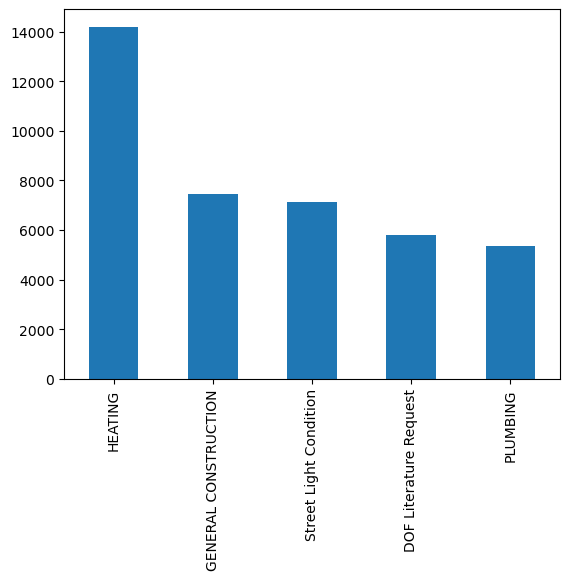

In [40]:
complains['Complaint_Type'].value_counts().head().plot(kind='bar')

In [ ]:
#value counts gives the number of each complaint type and the .head returns the top five and you graph ot using .plot

### 7. What's the most common `Borough` the complain came? Display top 5 most and plot them out

<Axes: ylabel='Complaint_Type'>

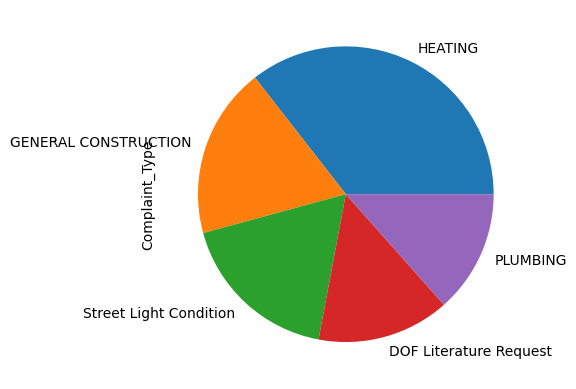

In [42]:
complains['Complaint_Type'].value_counts().head().plot(kind='pie')
#value counts gives the number of each complaint type and the .head returns the top five and you graph ot using .plot

### 8. Which agency received the most complain and which one least?

In [45]:
#use agency name to find the name of the agency and count the values to see which has the most complaints using head
complains['Agency_Name'].value_counts().head(1)

Department of Housing Preservation and Development    39067
Name: Agency_Name, dtype: int64

In [46]:
# we do the sameting on this ine but use tail to get the last one
complains['Agency_Name'].value_counts().tail(1)

School - Grace Dodge Career and Technical Education High School    1
Name: Agency_Name, dtype: int64

## 9. Investigate the data set and look for meaningful information for two more questions (Indivijual/ discuss with partner)
We will discuss the new findings in Tueaday's class

In [53]:
#Most common descriptions complaints recieved
complains['Descriptor'].value_counts().head()

HEAT                                                       14126
Street Light Out                                            5396
Property Tax Exemption Application for Owners - English     4683
No Access                                                   3429
Loud Music/Party                                            3166
Name: Descriptor, dtype: int64

In [57]:
#This shows the most common locations of where complaint occur
complains['Location_Type'].value_counts().head()

RESIDENTIAL BUILDING    39067
Street/Sidewalk         12036
Street                  11569
Sidewalk                 5220
Club/Bar/Restaurant      1865
Name: Location_Type, dtype: int64

### 10. Select illegal Parking complains at Queens Borough and save it to new_complaint. How many entries are there?
You can use `query`/iloc

In [48]:
#use query to get specific data needed. 
new_complains=complains.query('Complaint_Type == "Illegal Parking" & Borough== "Queens"')

In [50]:
#use len to get a countof the entries
len(new_complains)

0

### 11. Filter 3 columns `Complaint_Type, Created_Date,Descriptor` from the new_complaint and save it as a CSV file named **Complains at Queens**.

In [51]:
new_complains=new_complains[['Complaint_Type', 'Created_Date','Descriptor']].head()

In [52]:
new_complains.to_csv('newdata', 
          index=False)

### 12. Load it back to verify the data

In [58]:
complains.to_csv('311-service-requests.csv', 
          index=False)

In [59]:
pd.read_csv('311-service-requests.csv',
           index_col=[0])

/var/folders/p4/4tlj1j3x5ysgr3r9y3b5tp2w0000gn/T/ipykernel_84157/2840286520.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('311-service-requests.csv',


,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,Street_Name,...,Taxi_Pick_Up_Location,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Terminal_Name,Location,month,year
Unique_Key,,,,,,,,,,,,,,,,,,,,,
26589651,2013-10-31 02:08:41,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.70827532593202, -73.79160395779721)",10,2013
26593698,2013-10-31 02:01:04,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378.0,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.721040535628305, -73.90945306791765)",10,2013
26594139,2013-10-31 02:00:24,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.84332975466513, -73.93914371913482)",10,2013
26595721,2013-10-31 01:56:23,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023.0,WEST 72 STREET,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.7780087446372, -73.98021349023975)",10,2013
26590930,2013-10-31 01:53:44,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027.0,WEST 124 STREET,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.80769092704951, -73.94738703491433)",10,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26426013,2013-10-04 00:01:13,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2013
26428083,2013-10-04 00:01:05,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.656160351546845, -73.76735262738222)",10,2013
26428987,2013-10-04 00:00:45,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016.0,344 EAST 28 STREET,EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40.740295354643706, -73.97695165980414)",10,2013
